# Assignment
1. For those students who did advanced study for Euclidean Distance, create your own version of KNN & training (50 points)
2. For those who did not, try different distance measurement(manhattan, minkowski)(50 points)
3. If tried both, 100 points

Notes:
- Manual or Scikit Learn
- Document your work
- Each bug(2 points, maximum of 10)
- Each correction (3 points)

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from collections import Counter
from sklearn.metrics import accuracy_score

# Euclidean Distance Manually

In [2]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def Fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def Predict(self, X):
        predictions = [self._Predict(x) for x in X]
        return predictions

    def _Predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    

In [3]:
data = pd.read_csv('./Iris.csv')
data['SepalLengthCm']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data['Species'] = data['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
data['Species'].unique()

array([0, 1, 2], dtype=int64)

In [6]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = data['Species'].values

In [7]:
#f rom sklearn import datasets
from sklearn.model_selection import train_test_split 

# iris = datasets.load_iris()
# X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



clf = KNN(k=7)#(k=5) original
clf.Fit(X_train, y_train)
predictions = clf.Predict(X_test)

print(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

[1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
0.9666666666666667


In [8]:
y_test[0:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix
y_pred = clf.Predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

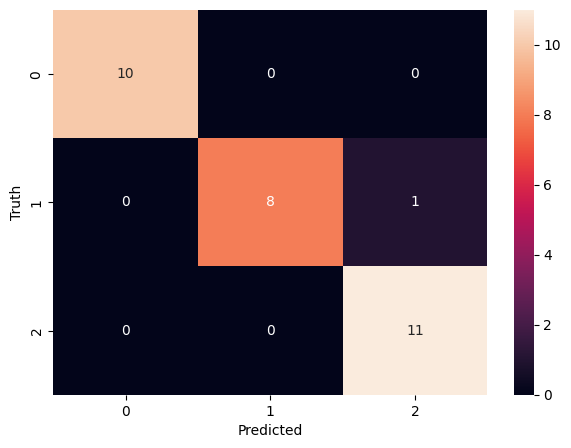

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Euclidean Distance with scikitlearn

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')# (n_neighbors=5) original
  
knn.fit(X_train, y_train)

print(knn.predict(X_test))
print(knn.score(X_test, y_test))

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
0.9666666666666667


In [37]:
#https://www.youtube.com/watch?v=CQveSaMyEwM
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

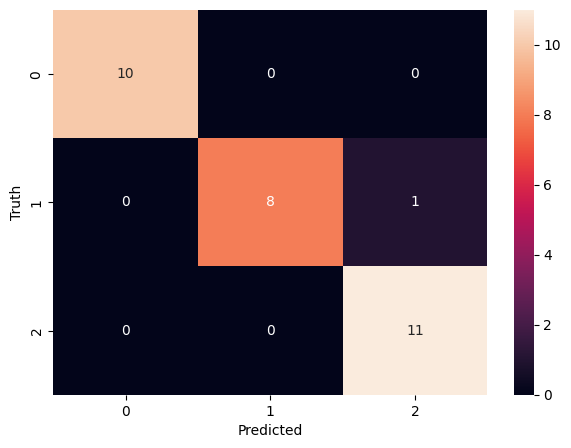

In [38]:
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Manhattan Distance Manually

In [15]:
def manhattan_distance(x1, x2):
    distance = sum(abs(x1 - x2))
    return distance

class KNN_Manhattan:
    def __init__(self, k=3):
        self.k = k

    def Fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def Predict(self, X):
        predictions = [self._Predict(x) for x in X]
        return predictions

    def _Predict(self, x):
        # compute the distance
        distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_Manhattan = KNN_Manhattan(k=7) #(k=5)  original
clf_Manhattan.Fit(X_train, y_train)
predictions = clf_Manhattan.Predict(X_test)

print(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
1.0


In [39]:
y_pred = clf_Manhattan.Predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

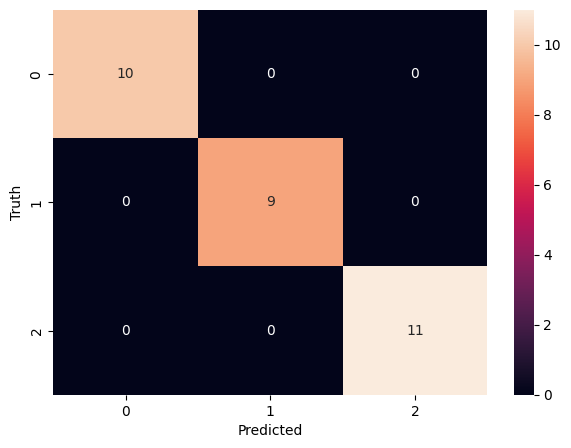

In [40]:
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KNN Manhattan Scikit

In [19]:
knn_manhattan = KNeighborsClassifier(n_neighbors=7, metric='manhattan')#n_neighbors = 5

knn_manhattan.fit(X_train, y_train)

print(knn_manhattan.predict(X_test))
print(knn_manhattan.score(X_test, y_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
1.0


In [41]:
y_pred = knn_manhattan.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

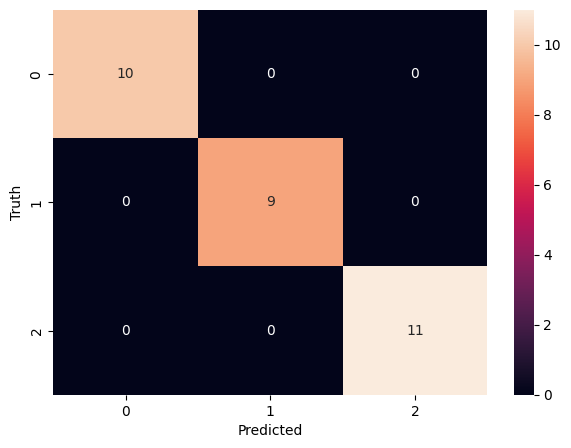

In [42]:
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Minkowski Manually


In [30]:
def minkowski_distance(x, y, p):
    distance = np.power(np.sum(np.power(np.abs(x - y), p)), 1/p)
    return distance

class KNN_Minkowski:
    def __init__(self, k, p):
        self.k = k
        self.p = p

    def minkowski_distance(self, x, y):
        distance = np.power(np.sum(np.power(np.abs(x - y), self.p)), 1/self.p)
        return distance

    def Fit(self, X, y):
        self.X_train = X
        self.y_train = y


    def Predict(self, X):
        n_test = X_test.shape[0]
        n_train = self.X_train.shape[0]
        y_pred = np.zeros(n_test)
        for i in range(n_test):
            distances = np.zeros(n_train)
            for j in range(n_train):
                distances[j] = self.minkowski_distance(X_test[i], self.X_train[j])
            idx = np.argsort(distances)[:self.k]
            k_labels = self.y_train[idx]
            counts = np.bincount(k_labels.astype('int'))
            y_pred[i] = np.argmax(counts)
        return y_pred

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_Minkowski = KNN_Minkowski(k=7,p=1) #(k=5)  original
clf_Minkowski.Fit(X_train, y_train)
predictions = clf_Minkowski.Predict(X_test)

print(predictions)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]
1.0


In [43]:
y_pred = clf_Minkowski.Predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

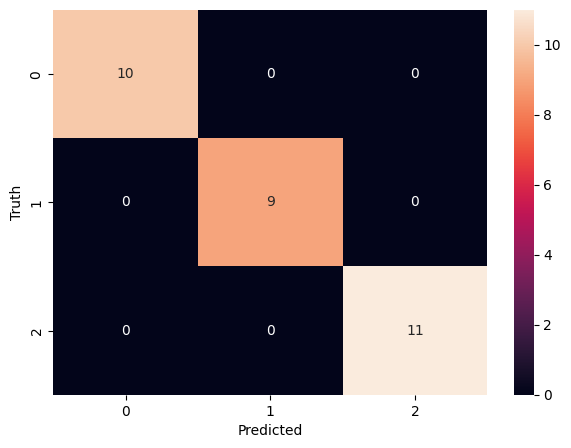

In [44]:
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Minkowski using scikitlearn

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
knn_Minkowski = KNeighborsClassifier(n_neighbors=7)# (n_neighbors=5) original
  
knn_Minkowski.fit(X_train, y_train)

print(knn_Minkowski.predict(X_test))
print(knn_Minkowski.score(X_test, y_test))

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
0.9666666666666667


In [45]:
y_pred = knn_Minkowski.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

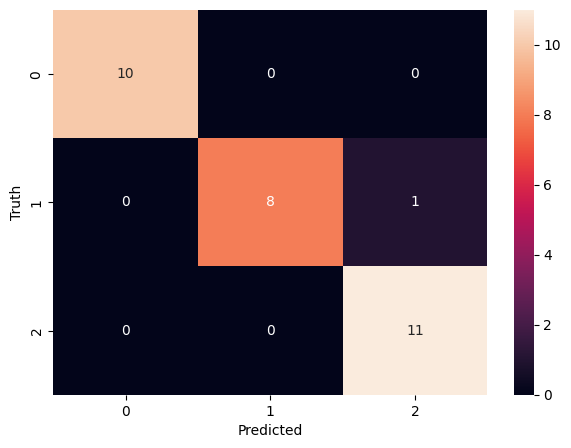

In [46]:
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The bug is that the Minkowski distance using SciKit Learn function has different accuracy with the manual Minkowski distance